#Maintenance cost reduction through predictive techniques 

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Import Dataset


In [106]:
df = pd.read_csv('/content/maintenance_dataset')
df.head(10)

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
5,1/1/2015,S1F01TD5,0,68837488,0,0,41,6,413535,0,0,1
6,1/1/2015,S1F01XDJ,0,227721632,0,0,0,8,402525,0,0,0
7,1/1/2015,S1F023H2,0,141503600,0,0,1,19,494462,16,16,3
8,1/1/2015,S1F02A0J,0,8217840,0,1,0,14,311869,0,0,0
9,1/1/2015,S1F02DZ2,0,116440096,0,378,9,9,407905,0,0,170


In [107]:
df.shape

(124494, 12)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   date     124494 non-null  object
 1   device   124494 non-null  object
 2   failure  124494 non-null  int64 
 3   metric1  124494 non-null  int64 
 4   metric2  124494 non-null  int64 
 5   metric3  124494 non-null  int64 
 6   metric4  124494 non-null  int64 
 7   metric5  124494 non-null  int64 
 8   metric6  124494 non-null  int64 
 9   metric7  124494 non-null  int64 
 10  metric8  124494 non-null  int64 
 11  metric9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [109]:
df.describe()

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223881e+08,159.492706,9.940897,1.741120,14.222669,260172.657726,0.292528,0.292528,13.013848
std,0.029167,7.045933e+07,2179.677781,185.748131,22.908507,15.943028,99151.078547,7.436924,7.436924,275.661220
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227974e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833096e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,70000.000000


In [110]:
df.shape

(124494, 12)

In [111]:
df.columns

Index(['date', 'device', 'failure', 'metric1', 'metric2', 'metric3', 'metric4',
       'metric5', 'metric6', 'metric7', 'metric8', 'metric9'],
      dtype='object')

#Preprocessing

##Handling Missing values

In [112]:
df.isnull().sum()

date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64

In [113]:
df.dropna(inplace=True)

In [114]:
df.isna().sum()

date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64

In [115]:
df.shape

(124494, 12)

##Conversion of date

In [116]:
pd.to_datetime(df["date"], format="%m/%d/%Y").dt.year.unique()

array([2015])

In [117]:
# Extracting Day
df["day"] = pd.to_datetime(df["date"], format="%m/%d/%Y").dt.day

# Extracting months
df["months"] = pd.to_datetime(df["date"], format="%m/%d/%Y").dt.month

In [118]:
cols = ["date", "device"]
df.drop(cols, axis=1, inplace=True)

In [119]:
df.head()

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,day,months
0,0,215630672,55,0,52,6,407438,0,0,7,1,1
1,0,61370680,0,3,0,6,403174,0,0,0,1,1
2,0,173295968,0,0,0,12,237394,0,0,0,1,1
3,0,79694024,0,0,0,6,410186,0,0,0,1,1
4,0,135970480,0,0,0,15,313173,0,0,3,1,1


In [120]:
df.shape

(124494, 12)

#Data Visualization

## Data Imbalance

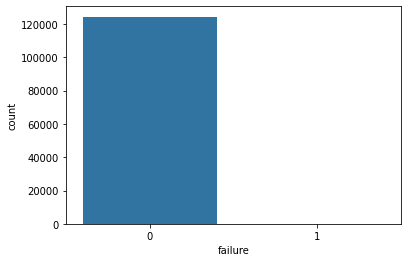

In [121]:
sns.countplot(df['failure'])

In [122]:
df['failure'].value_counts()

0    124388
1       106
Name: failure, dtype: int64

## Distribution 

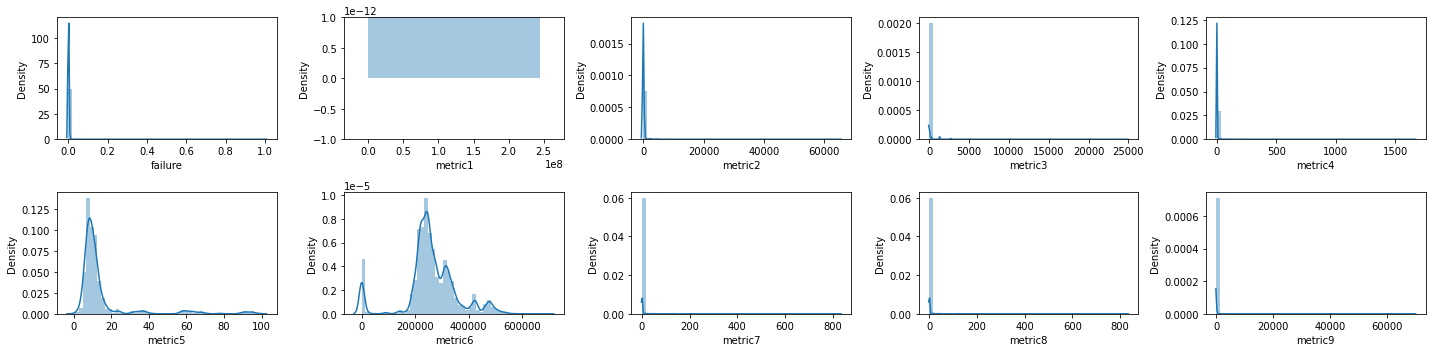

In [123]:
plt.figure(figsize=(20,5))
plt_num = 1

for col in df.columns:
    if plt_num < 11:
        plt.subplot(2,5,plt_num)
        sns.distplot(df[col])
    plt_num += 1
plt.tight_layout()

## Correlation

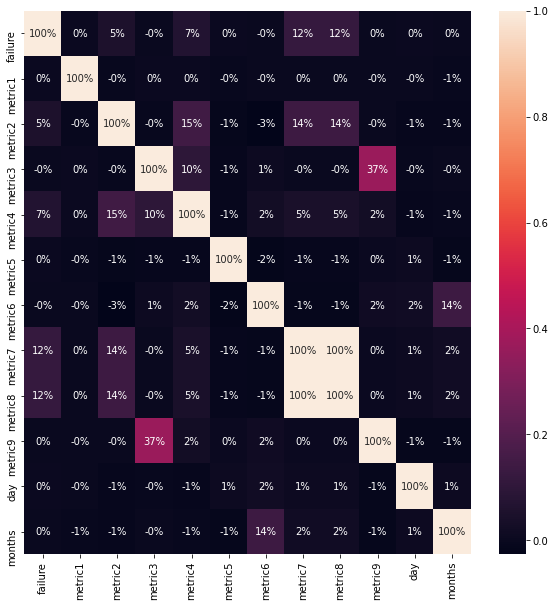

In [124]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [125]:
df.drop('metric8', axis=1, inplace=True)

#Split into input and output elements

In [126]:
X = df.iloc[:, 1:]
y = df['failure']

#Building Models using Stratified K-fold CV

In [127]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import f1_score

In [128]:
skf = StratifiedKFold(n_splits=10)

In [129]:
def train_model(X, y, model):
    score = 0

    for train_index,test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        score = score + model.score(X_test,y_test)

    print('Mean Accuracy = ', score/10)
    plot_roc_curve(model, X_test, y_test )
    plot_confusion_matrix(model, X_test,y_test)

##Defining our models

In [130]:
base_model = DummyClassifier(strategy='constant', constant=1)
log_reg_model = LogisticRegression(solver='newton-cg')
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier(n_estimators=100)

##**Baseline Model**

Mean Accuracy =  0.0008514456250578665


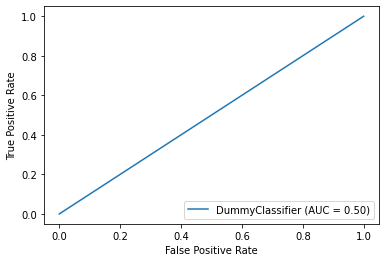

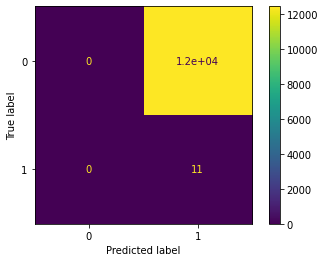

In [131]:
train_model(X, y, base_model)

##**Logisitic Regression Model**

Mean Accuracy =  0.9990360994141237


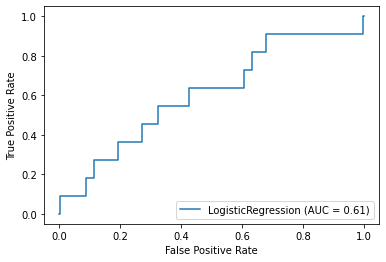

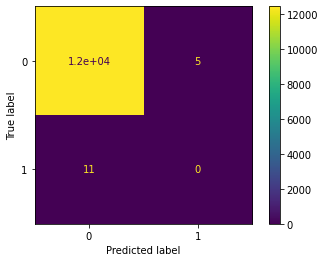

In [132]:
train_model(X, y, log_reg_model)

##**Decision Tree Model**

Mean Accuracy =  0.9545459137538183


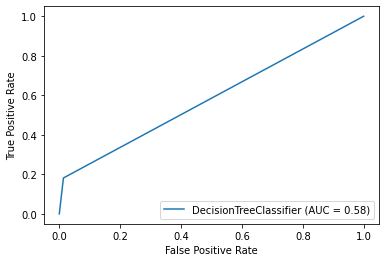

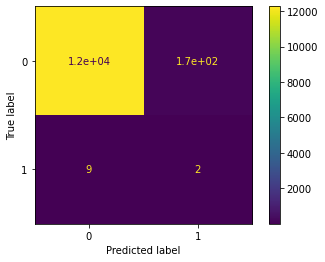

In [133]:
train_model(X, y, dt_model)

##**Random Forest Model**

Mean Accuracy =  0.9988031483311349


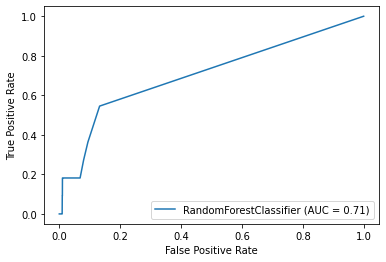

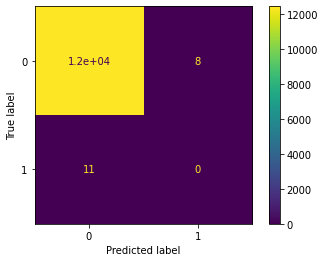

In [134]:
train_model(X, y, rf_model)